# Problem (2.54)

## Problem statement

Find the first three excited state energies (to five significant digits) for the harmonic osillator, by wagging the dog (Problem 2.54). For the first and third excited state you will need to set $\psi(0) = 0$ and $\psi'(0) = 1$

----

## Solution

The Schrodinger Equation for the HO is given by equation 2.72

$$ \frac{d^2 \psi}{d \xi^2} = (\xi^2 - K) \psi $$

In [3]:
import numpy as np
from scipy.integrate import odeint

Lets do the first excited state, $\psi_1$, first

In [19]:
xi = np.linspace(0, 10, 400)

def func(y, xi, K):

    psi, psiprime = y
    
    psidoubleprime = (xi**2 - K)*psi
    
    return psiprime, psidoubleprime

In [20]:
y0 = (0.0, 1.0)

result = odeint(func, y0, xi, args=(3.001,)) #we can cheat a little since we know the energies, here is a high estimate for K

In [21]:
from matplotlib import pyplot as plt

In [22]:
%matplotlib inline

In [23]:
result.shape

(400, 2)

In [24]:
psi = result[:,0]

In [25]:
psiprime = result[:,1]

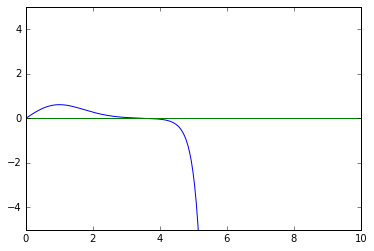

In [26]:
plt.plot(xi, psi)
plt.xlim(0,10)
plt.ylim(-5,5)
plt.plot(xi,np.zeros_like(xi))

Our energy is too high, lets try a lower one

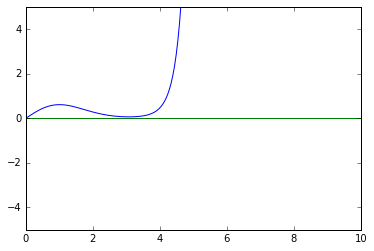

In [27]:
result = odeint(func, y0, xi, args=(2.99,))
psi = result[:,0]
plt.plot(xi, psi)
plt.xlim(0,10)
plt.ylim(-5,5)
plt.plot(xi,np.zeros_like(xi))

Now our energy is too low. Lets see if we can use the automated method. 

In [28]:
def bisect(func, E1, E2, even=True):
    """Given two ends of an energy interval, chop it in half."""
    
    xi = np.linspace(0, 10, 400)
    
    if even:
        y0 = (1.0, 0.0)
    else:
        y0 = (0.0, 1.0)
        
    # get initial signs
    res1 = odeint(func, y0, xi, args=(E1,))
    psi1 = res1[-1,0]
    
    res2 = odeint(func, y0, xi, args=(E2,))
    psi2 = res2[-1,0]
    
    Ehalf = (E1+E2)/2
    reshalf = odeint(func, y0, xi, args=(Ehalf,))
    psihalf = reshalf[-1, 0]
    
    if np.sign(psihalf) == np.sign(psi1):
        return (Ehalf, E2)
    else:
        return (E1, Ehalf)
    

def find_energy(func, E1, E2, even=True):
    
    while abs(E1-E2) > 1.0e-14:
        E1, E2 = bisect(func, E1, E2, even)
        
    if even:
        y0 = (1.0, 0.0)
    else:
        y0 = (0.0, 1.0)

    x = np.linspace(0, 10, 400)
    result = odeint(func, y0, xi, args=(E1, ))
    psi = result[:,0]
    plt.plot(xi, psi)
    plt.ylim(-5, 5)
    plt.xlim(0, 10)
    
    return E1

2.9999999812094122

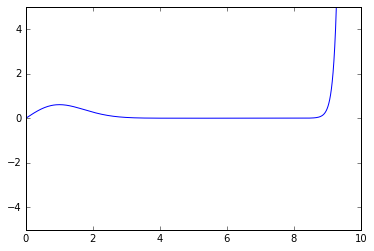

In [34]:
find_energy(func, 2.99, 3.01, even=False)

$K$ is approximately 3, which correspond to the $E_1 = \frac{3\hbar\omega}{2}$

Lets try for $\psi_2$ now

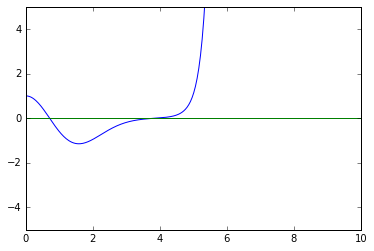

In [35]:
y0 = (1.0, 0.0)  #this solution is even, see fig 2.7a

result = odeint(func, y0, xi, args=(5.001,))
psi = result[:,0]
plt.plot(xi, psi)
plt.xlim(0,10)
plt.ylim(-5,5)
plt.plot(xi,np.zeros_like(xi))

Too much curvature near the crossing point so let's try a smaller K

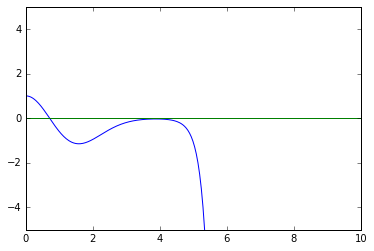

In [36]:
result = odeint(func, y0, xi, args=(4.999,))
psi = result[:,0]
plt.plot(xi, psi)
plt.xlim(0,10)
plt.ylim(-5,5)
plt.plot(xi,np.zeros_like(xi))

Not enough energy, now automate

5.000000045327937

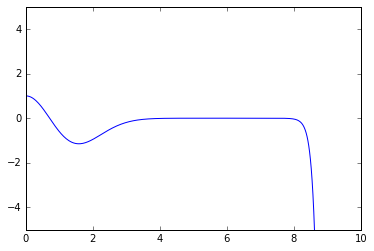

In [37]:
find_energy(func, 4.999, 5.001)

$K$ is approximately 5, which corresponds to $E_2 = \frac{5\hbar\omega}{2}$

Now let's do $\psi_3$

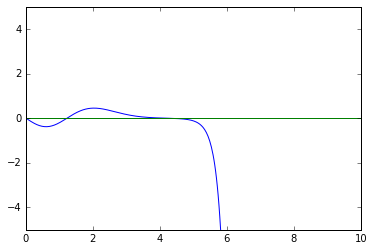

In [41]:
y0 = (0.0, -1.0)  #this solution is odd, see fig 2.7a

result = odeint(func, y0, xi, args=(7.001,))
psi = result[:,0]
plt.plot(xi, psi)
plt.xlim(0,10)
plt.ylim(-5,5)
plt.plot(xi,np.zeros_like(xi))

Too high

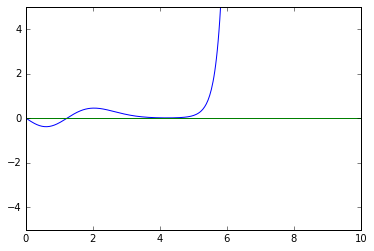

In [42]:
result = odeint(func, y0, xi, args=(6.999,))
psi = result[:,0]
plt.plot(xi, psi)
plt.xlim(0,10)
plt.ylim(-5,5)
plt.plot(xi,np.zeros_like(xi))

Too low, now automate

6.999999990519012

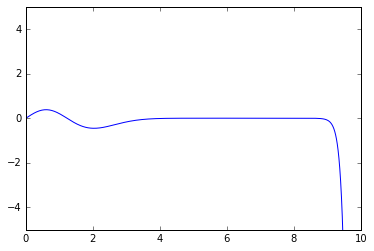

In [43]:
find_energy(func, 6.999, 7.001, even=False)

$K$ is approximately 7, which corresponds to $E_3 = \frac{7\hbar\omega}{2}$

----

## Portfolio references
* Problem 2.55, 2.56
## Index terms
* Harmonic Oscillator
* Shooting
## Book references
* eq 2.72, fig. 2.7a
## External references
* Shooting.ipynb